## -- Start --

In [207]:
import datetime as dt
import numpy as np
import pandas as pa
# Visula
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn import model_selection

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [208]:
def rem(data):
    data = data.rename(columns={'cveid':'hashid','hash':'link','link':'lastModifiedDate'})
    data = data.drop(['link','hashid'],axis=1)
    data.index.names = ['cveid']
    data.lastModifiedDate = pa.to_datetime(data.lastModifiedDate).dt.date
    data.publishedDate =  pa.to_datetime(data.publishedDate).dt.date
    data['update_time'] = (data.lastModifiedDate-data.publishedDate).dt.days
    data.lastModifiedDate = pa.to_datetime(data.publishedDate).astype(int)
    data.publishedDate = pa.to_datetime(data.publishedDate).astype(int)
    
    return data
# data.head()

In [209]:
file = 'all/1-2018-all.csv'
file2017 = 'all/1-2017-all.csv'
file2016 = 'all/1-2016-all.csv'
file2015 = 'all/1-2015-all.csv'
file2014 = 'all/1-2014-all.csv'
file2013 = 'all/1-2013-all.csv'
file2012 = 'all/1-2012-all.csv'
file2011 = 'all/1-2011-all.csv'
file2010 = 'all/1-2010-all.csv'
dt2011 = rem(pa.read_csv(file2011))
dt2012 = rem(pa.read_csv(file2012))
dt2013 = rem(pa.read_csv(file2013))
dt2014 = rem(pa.read_csv(file2014))
dt2015 = rem(pa.read_csv(file2015))
dt2017 = rem(pa.read_csv(file2017))
dt2016 = rem(pa.read_csv(file2016))
dt2018 = rem(pa.read_csv(file))


In [210]:
# data['lastModeifiedDate']

In [211]:
dt2011.head()

,lastModifiedDate,publishedDate,attk_com,imp_scr,severity,base_scr,expl_bility_score,sub_count,star_count,forks_count,watchers_count,contr_count,update_time
cveid,,,,,,,,,,,,,
CVE-2011-0006,1340236800000000000,1340236800000000000,MEDIUM,2.9,LOW,1.9,3.4,6852,83289,29145,83289,NaN,5
CVE-2011-0469,1502928000000000000,1502928000000000000,LOW,8.5,HIGH,9.0,10.0,58,507,295,507,151.0,8
CVE-2011-0469,1502928000000000000,1502928000000000000,LOW,8.5,HIGH,9.0,10.0,58,507,295,507,151.0,8
CVE-2011-0530,1298332800000000000,1298332800000000000,LOW,6.4,HIGH,7.5,10.0,30,220,68,220,45.0,2368
CVE-2011-0716,1340236800000000000,1340236800000000000,MEDIUM,6.9,MEDIUM,4.7,3.4,6852,83289,29145,83289,NaN,1630


In [212]:
dt = pa.concat([dt2018,dt2017,dt2016,dt2015,dt2014,dt2013,dt2012,dt2011])

In [190]:
att = pa.get_dummies(dt.attk_com,prefix='attk_com')
sev = pa.get_dummies(dt.severity,prefix='severity')
dt = pa.concat([dt.drop(['attk_com','severity'],axis=1),att,sev],axis=1)

## Handling Nan's

In [191]:
dt = dt.fillna(dt.median())

In [218]:
dt

,lastModifiedDate,publishedDate,imp_scr,base_scr,expl_bility_score,sub_count,star_count,forks_count,watchers_count,contr_count,update_time
cveid,,,,,,,,,,,
CVE-2018-0046,1539129600000000000,1539129600000000000,2.9,4.3,8.6,79,470,432,470,83.0,50
CVE-2018-0429,1533772800000000000,1533772800000000000,6.4,4.6,3.9,81,669,89,669,8.0,62
CVE-2018-0500,1531267200000000000,1531267200000000000,6.4,7.5,10.0,669,15568,3379,15568,368.0,261
CVE-2018-1000041,1518134400000000000,1518134400000000000,2.9,4.3,8.6,14,188,29,188,97.0,21
CVE-2018-1000041,1518134400000000000,1518134400000000000,2.9,4.3,8.6,3,7,3,7,1.0,21
...,...,...,...,...,...,...,...,...,...,...,...
CVE-2011-4969,1362700800000000000,1362700800000000000,2.9,4.3,8.6,3444,52642,18793,52642,278.0,2230
CVE-2011-5097,1344384000000000000,1344384000000000000,4.9,5.5,8.0,419,6040,2383,6040,325.0,5
CVE-2011-5098,1344384000000000000,1344384000000000000,6.4,6.5,8.0,419,6040,2383,6040,325.0,2


In [229]:
# sns.lmplot(y='update_time',x='imp_scr',fit_reg=True,data=dt)

## Ploting Model Between [ Time to fix to no. of contrebuters ]

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


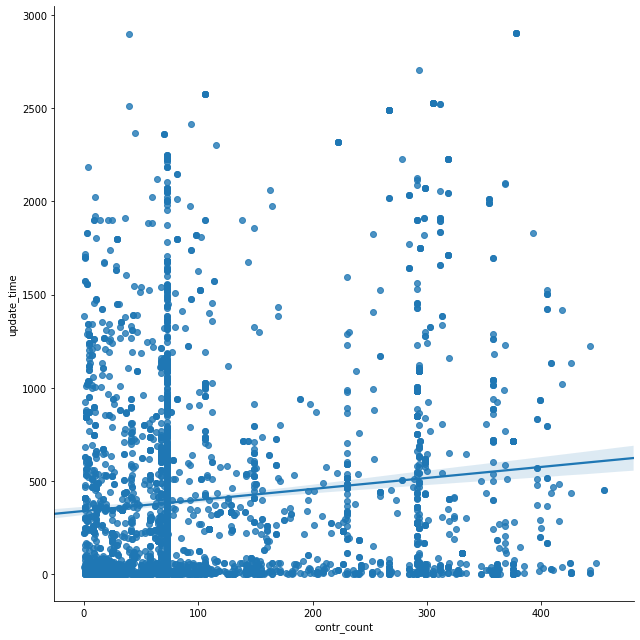

In [192]:
sns.lmplot(x='contr_count',y='update_time',data=dt,fit_reg=True,size=9) 

In [153]:
# sns.lmplot(x='contr_count',y='update_time',hue='attk_com',col='attk_com',data=dt,fit_reg=True)

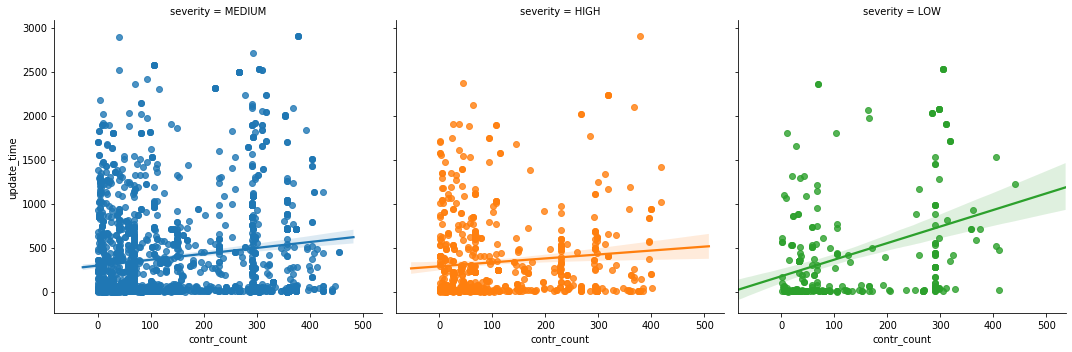

In [72]:
sns.lmplot(x='contr_count',y='update_time',hue='severity',col='severity',data=dt,fit_reg=True)

#### -- Expecting an underfit

# Building and Testing Different Models k-fold cross-validation

In [193]:
x_array,y_array = np.array(dt.drop(['update_time'],1)),np.array(dt['update_time'])
x_train,x_validt,y_train,y_validt = model_selection.train_test_split(x_array,y_array,test_size=0.3)

In [197]:
models = list()
# models.append(('LM',))
models.append(('LR',LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFG',RandomForestClassifier(n_estimators=100)))

results = []
names = []
scores = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=7)
    cv_results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
    scores.append(msg)

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn

## Models and Their Scores  (Model, accurecy mean,accurecy Stnd. Dev)

In [198]:
for s in scores:
    print(s)

LR: 0.045797 (0.012499)
LDA: 0.106547 (0.024328)
KNN: 0.316571 (0.030451)
CART: 0.408882 (0.023219)
NB: 0.182546 (0.019363)
SVM: 0.343396 (0.026419)
RFG: 0.415665 (0.027343)


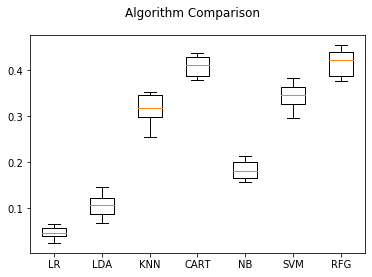

In [199]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Building Model

In [201]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
res= model.predict(x_validt)

In [205]:
accuracy_score(res,y_validt)

0.370253164556962

## Continues ( Underfit )

In [ ]:
# import pandas as pa
# import csv
# import json as json
# from github import Github
# #  Edit File path and year of the file accoding to the needs.
# # Creates `YEAR`-cvehash.csv file in the current file path unless 
# #  Specified.

# # Source File.
# year = 2017

# def file_save(year):
#     file  = 'nvd/nvdcve-1.1-'+str(year)+'.json'
#     # Destination path Type String only
#     path = 'all/1-'
#     un = list()
#     with open(file, encoding='utf-8') as f :
#         data = json.load(f)
#         data = data['CVE_Items']
        
#         # Desitination file creation.
#         f = open(path+str(year)+'-all.csv','w')
#         repo = Github("fab412aea9ded394ff82","f69fb6e9e105aabf3e3d2f651c30262838b7bb16")
#         # coloums of the newly created cvehash file.
#         head = ['cveid','hash','link','lastModifiedDate','publishedDate','attk_com','imp_scr','severity','base_scr','expl_bility_score','sub_count','star_count','forks_count','watchers_count','contr_count']
#         ct =0
#         with f :
#             writer = csv.writer(f)
#             l = [head]
#             writer.writerow(head)
#             for n in range(0,len(data)):
#                 url = []
#                 csvid = data[n]['cve']['CVE_data_meta']['ID']
#                 date_p = data[n]['publishedDate']
#                 date_m = data[n]['lastModifiedDate']
#                 describtion =  data[n]['cve']['description']['description_data'][0]['value']
#                 attk_com=imp_scr=severity=base_scr=expl_bility_score='Nan'
#                 if len(data[n]['impact'])>0:
#                     attk_com = data[n]['impact']['baseMetricV2']['cvssV2']['accessComplexity']
#                     imp_scr = data[n]['impact']['baseMetricV2']['impactScore']
#                     severity = data[n]['impact']['baseMetricV2']['severity']
#                     base_scr = data[n]['impact']['baseMetricV2']['cvssV2']['baseScore']
#                     expl_bility_score = data[n]['impact']['baseMetricV2']['exploitabilityScore']
#                 for ref in data[n]['cve']['references']['reference_data']:
#                     url = ref['url']
#                     t = url
#                     url = url.strip().split('://')
#                     if(url[1].split('/')[0] == 'github.com') and (url[1].split('/')[-2] == "commit"):
#                         link = ''.join([x for x in url[1]])
#                         link = "http://"+link
#                         repo_date = 'nan'
#                         url = url[1].split('/')
#                         if len(url[-1])>40:
#                             hashid = (url[-1][:40])
#                         else:
#                             hashid = (url[-1])
#                         r = '/'.join(link[17:].split('/')[:3])[1:]
#                         a = link.split('/')
#                         a[-2] = 'branch_commits'
#                         try:
#                             gr = repo.get_repo(r)
#                         except :
#                             un.append(r)
#                             print('Error Can\'t load '+str(url))
#                             continue
#                         try:
#                             date = gr.get_commit(hashid).last_modified
#                         except :
#                             un.append(url)
#                             print('Error commit hash not found'+str(url))
#                             continue
#                         contr_count = 'nan'
#                         try:
#                             contr_count = gr.get_contributors().totalCount
#                         except:
#                             contr_count = 'nan'
#                         sub_count = gr.subscribers_count
#                         star_count = gr.stargazers_count
#                         forks_count = gr.forks_count
#                         watchers_count = gr.watchers_count
#                         ct+=1
# #                         print(csvid)
#                         s =[csvid,hashid,link,date_m,date_p,attk_com,imp_scr,severity,base_scr,expl_bility_score,sub_count,star_count,forks_count,watchers_count,contr_count]
#                         writer.writerow(s)
#                     print(round((n/len(data))*100,2),end='\r')
# for i in range(10,15):
#     year =2000
#     year=2000+i
#     print(year)
#     file_save(year)